In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("8-fraud_detection.csv")

In [3]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [4]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [5]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [6]:
df['is_fraud'].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [7]:
#imbalanced dataset

In [8]:
df.isnull().sum()

transaction_amount        0
transaction_risk_score    0
is_fraud                  0
dtype: int64

In [9]:
X = df.drop("is_fraud",axis=1)
y = df["is_fraud"]

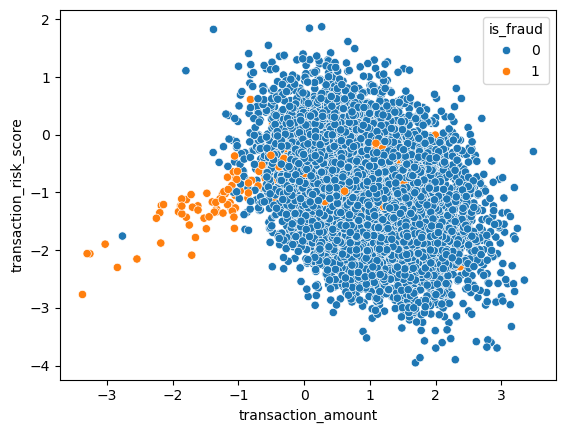

In [10]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"],hue=y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [14]:
#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [15]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [16]:
params = dict(penalty = penalty, C=c_values, solver=solver, class_weight = class_weight)

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [18]:
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [19]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [21]:
y_pred=grid.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.9888
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2478
           1       0.42      0.73      0.53        22

    accuracy                           0.99      2500
   macro avg       0.71      0.86      0.76      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
  [[2456   22]
 [   6   16]]


In [25]:
#roc, auc


The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [27]:
model_prob = grid.predict_proba(X_test)

In [28]:
model_prob

array([[0.99663049, 0.00336951],
       [0.84506075, 0.15493925],
       [0.95348862, 0.04651138],
       ...,
       [0.99062164, 0.00937836],
       [0.98574111, 0.01425889],
       [0.9980139 , 0.0019861 ]])

In [29]:
##  probabilities for the positive class
model_prob=model_prob[:,1]

In [30]:
model_prob

array([0.00336951, 0.15493925, 0.04651138, ..., 0.00937836, 0.01425889,
       0.0019861 ])

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
model_auc=roc_auc_score(y_test,model_prob)

In [34]:
model_auc

0.7367886613365257

In [35]:
# model false positive rate
# model true positive rate
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [36]:
thresholds

array([           inf, 9.53132799e-01, 6.35100053e-01, 5.97348162e-01,
       5.86167875e-01, 3.31454786e-01, 3.31264420e-01, 2.90578768e-01,
       2.87259286e-01, 1.94308189e-01, 1.94202641e-01, 1.91656418e-01,
       1.89225559e-01, 1.48290030e-01, 1.47870345e-01, 8.32411164e-02,
       8.32310617e-02, 6.02944799e-02, 6.02540150e-02, 5.80162407e-02,
       5.79602920e-02, 4.44397737e-02, 4.43676483e-02, 4.42904414e-02,
       4.41554275e-02, 2.92778247e-02, 2.92736355e-02, 2.34946113e-02,
       2.34888140e-02, 2.24072681e-02, 2.24036427e-02, 2.16511583e-02,
       2.16324387e-02, 1.64161526e-02, 1.63481511e-02, 1.30758142e-02,
       1.30727116e-02, 1.24695177e-02, 1.24693038e-02, 9.52741189e-03,
       9.52420678e-03, 8.91237743e-03, 8.86469728e-03, 8.05427178e-03,
       8.01350296e-03, 7.51222683e-03, 7.50697631e-03, 6.79896885e-03,
       6.78648762e-03, 4.10117942e-04])

In [37]:
model_tpr

array([0.        , 0.02631579, 0.39473684, 0.39473684, 0.42105263,
       0.42105263, 0.44736842, 0.44736842, 0.47368421, 0.47368421,
       0.5       , 0.5       , 0.52631579, 0.52631579, 0.55263158,
       0.55263158, 0.57894737, 0.57894737, 0.60526316, 0.60526316,
       0.63157895, 0.63157895, 0.65789474, 0.65789474, 0.68421053,
       0.68421053, 0.71052632, 0.71052632, 0.73684211, 0.73684211,
       0.76315789, 0.76315789, 0.78947368, 0.78947368, 0.81578947,
       0.81578947, 0.84210526, 0.84210526, 0.86842105, 0.86842105,
       0.89473684, 0.89473684, 0.92105263, 0.92105263, 0.94736842,
       0.94736842, 0.97368421, 0.97368421, 1.        , 1.        ])

In [38]:
model_fpr

array([0.        , 0.        , 0.        , 0.00121852, 0.00121852,
       0.01015435, 0.01015435, 0.01665313, 0.01665313, 0.04914703,
       0.04914703, 0.05077173, 0.05077173, 0.08042242, 0.08042242,
       0.1831844 , 0.1831844 , 0.25548335, 0.25548335, 0.27051178,
       0.27051178, 0.34890333, 0.34890333, 0.35052803, 0.35052803,
       0.47441105, 0.47441105, 0.54142973, 0.54142973, 0.55605199,
       0.55605199, 0.5698619 , 0.5698619 , 0.66125102, 0.66125102,
       0.72095857, 0.72095857, 0.73314379, 0.73314379, 0.7997563 ,
       0.7997563 , 0.80909829, 0.80909829, 0.82412673, 0.82412673,
       0.83712429, 0.83712429, 0.85783916, 0.85783916, 1.        ])

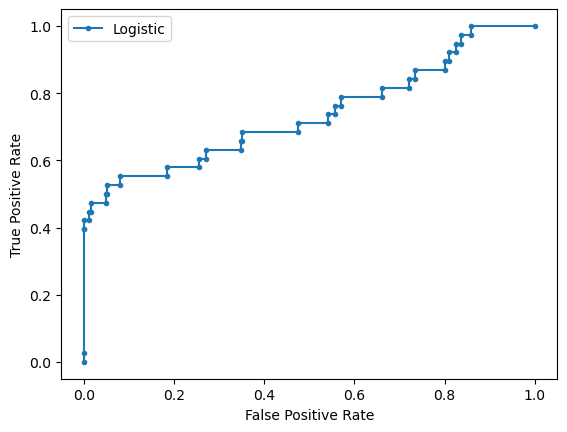

In [41]:
plt.plot(model_fpr, model_tpr, marker=".",label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

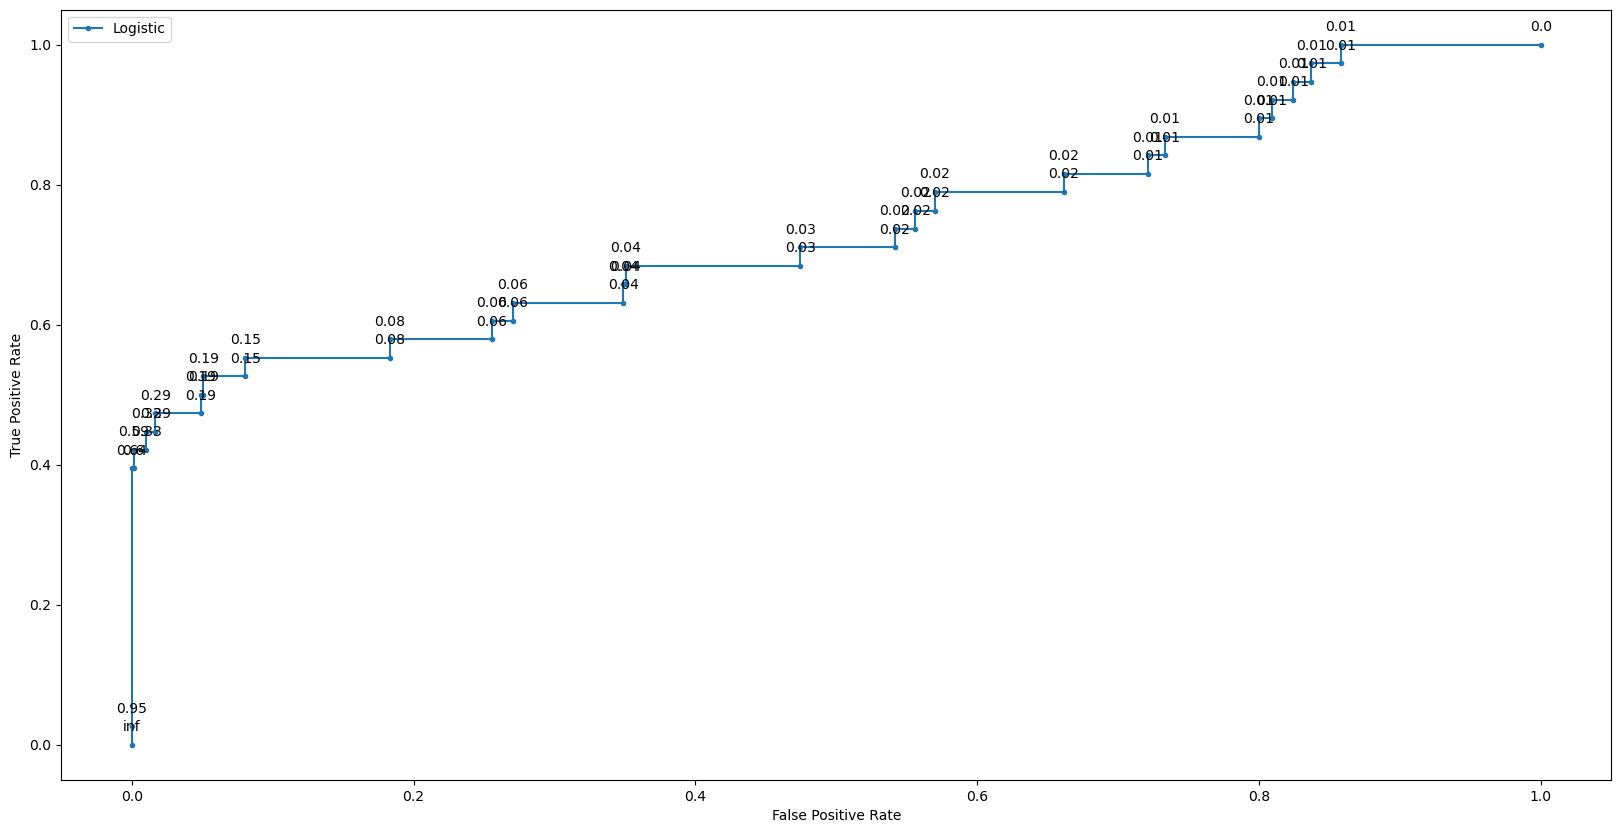

In [44]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [46]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.5 # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.5
[[2456    6]
 [  22   16]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.73      0.42      0.53        38

    accuracy                           0.99      2500
   macro avg       0.86      0.71      0.76      2500
weighted avg       0.99      0.99      0.99      2500



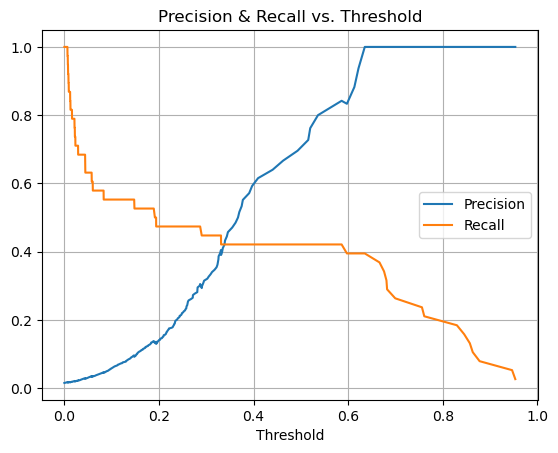

In [47]:

#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()